# Down Sampling & Up Sampling
Muhammad Gibran Basyir (24/536807/PA/22774)

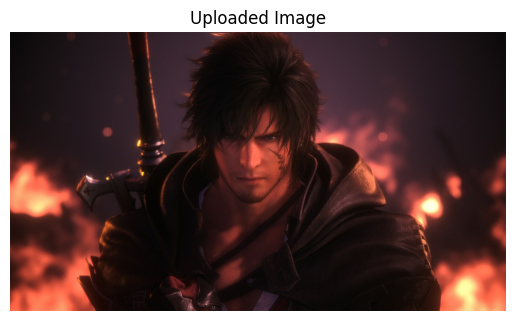

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# # Upload image - This caused an error, using direct file access instead
# uploaded = files.upload()   # A file picker will appear

# # Get filename - Not needed with direct file access
# filename = list(uploaded.keys())[0]

# Load with OpenCV from the file system
filename = '/content/final-fantasy-16-clive-rosfield.jpg' # Assuming the file is in the default Colab content directory
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(img)
plt.title("Uploaded Image")
plt.axis("off")
plt.show()

Original Image:

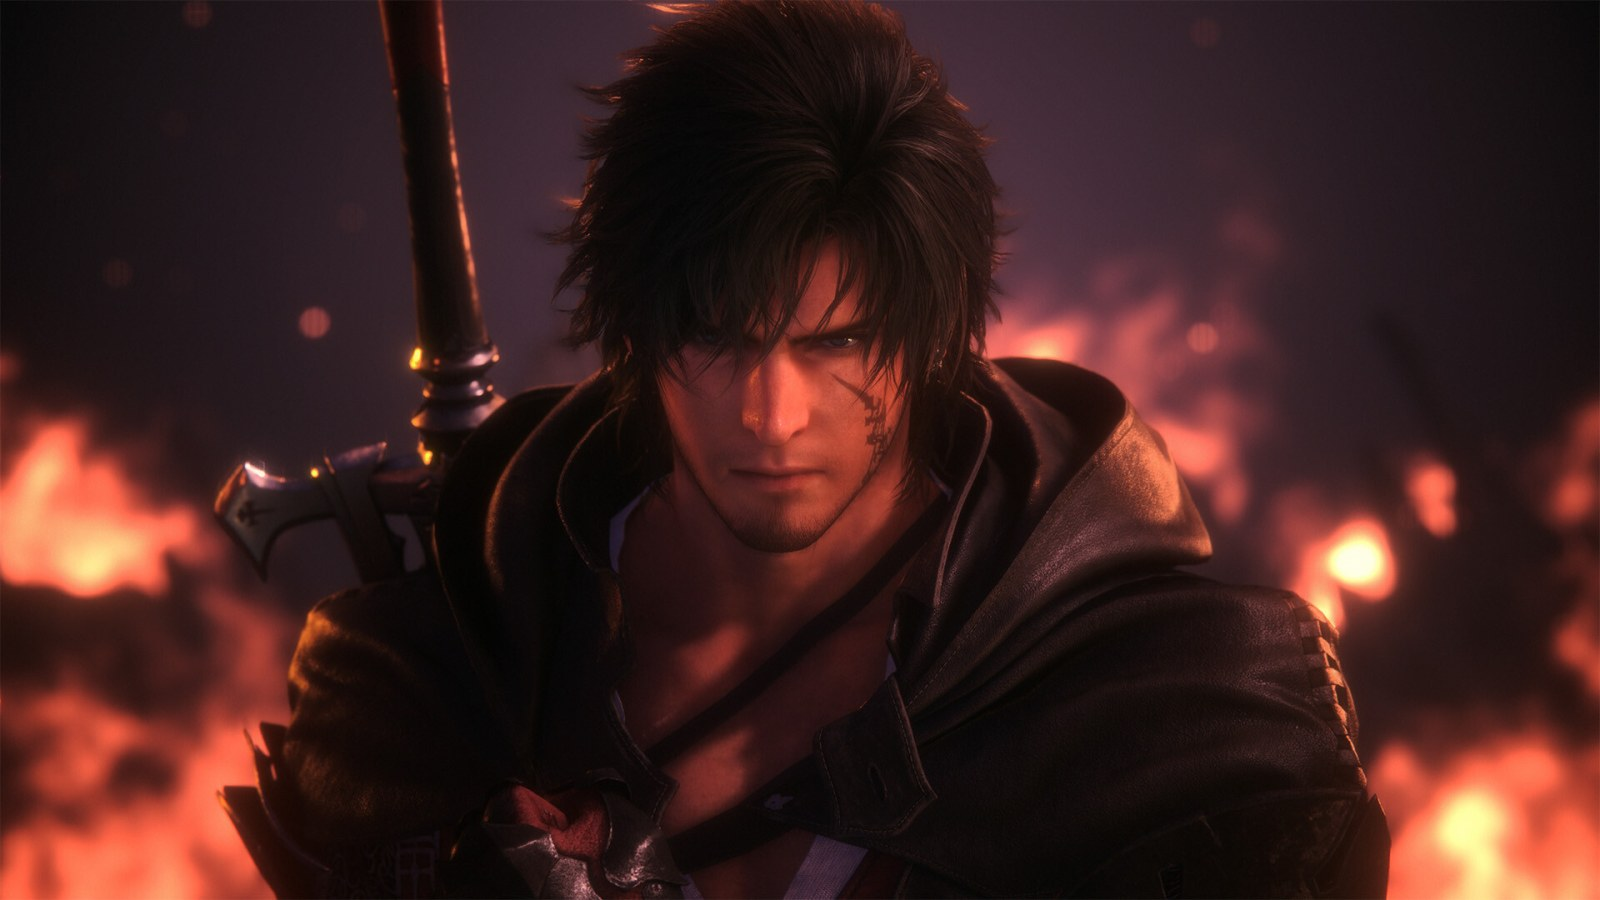

Image successfuly uploaded

Down Sampling (Max, Average, Medium)

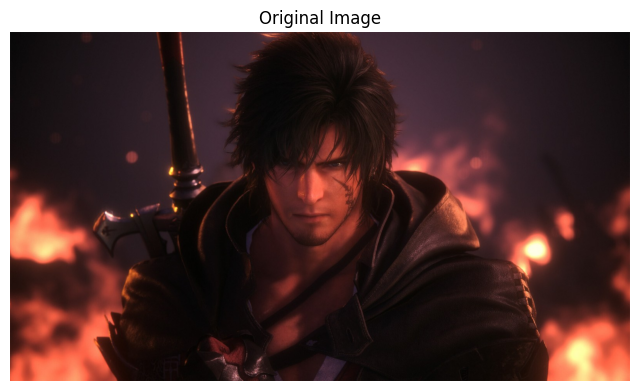

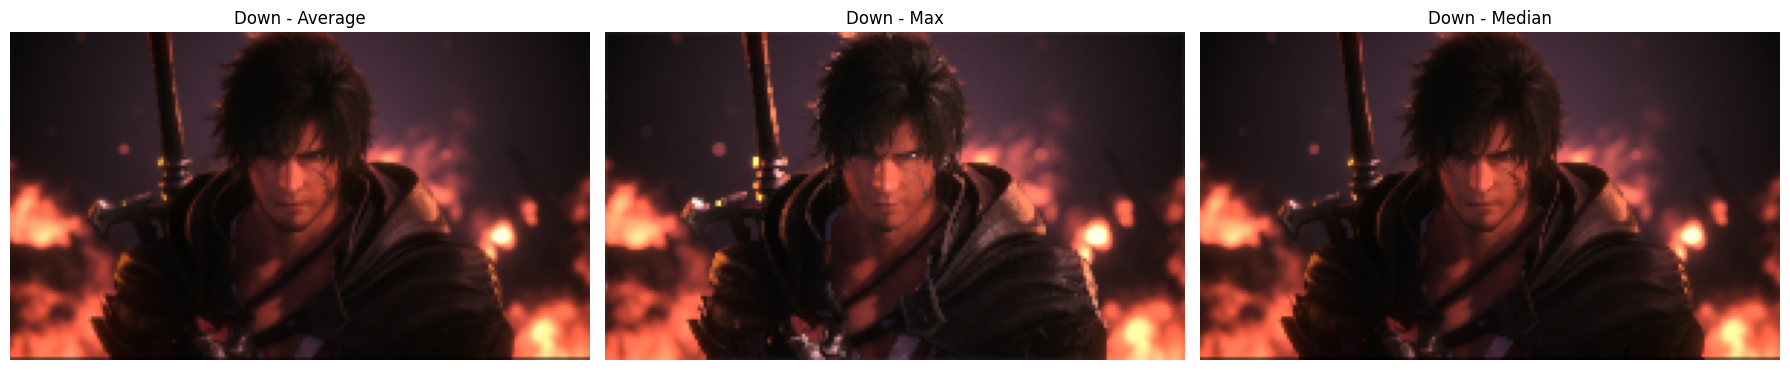

In [ ]:
from skimage.measure import block_reduce
import numpy as np
import matplotlib.pyplot as plt

# Define block size (8x8 reduction for stronger effect)
block_size = (8, 8, 1)

down_avg = block_reduce(img, block_size, np.mean).astype(np.uint8)
down_max = block_reduce(img, block_size, np.max).astype(np.uint8)
down_med = block_reduce(img, block_size, np.median).astype(np.uint8)

# Show original separately
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Show downsampled versions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(down_avg)
axes[0].set_title("Down - Average")
axes[0].axis("off")

axes[1].imshow(down_max)
axes[1].set_title("Down - Max")
axes[1].axis("off")

axes[2].imshow(down_med)
axes[2].set_title("Down - Median")
axes[2].axis("off")

plt.tight_layout()
plt.show()


Results from Downsampling:

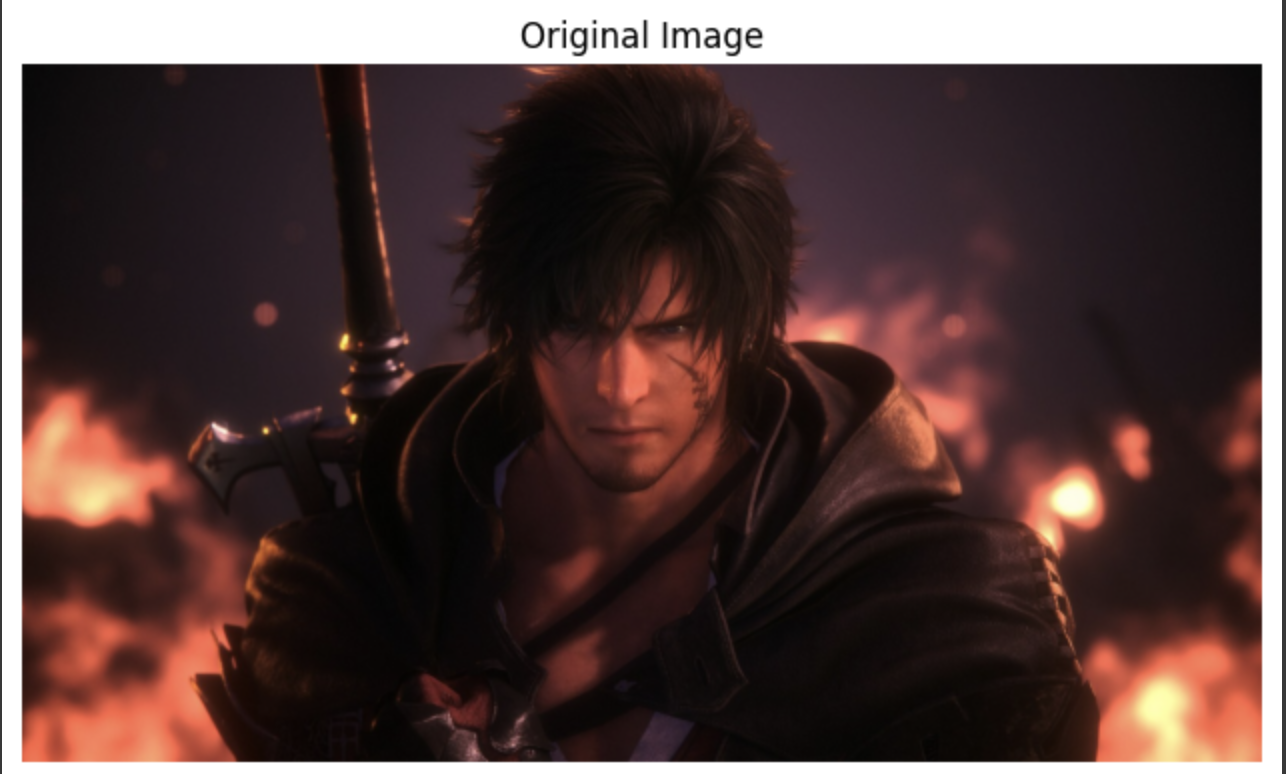

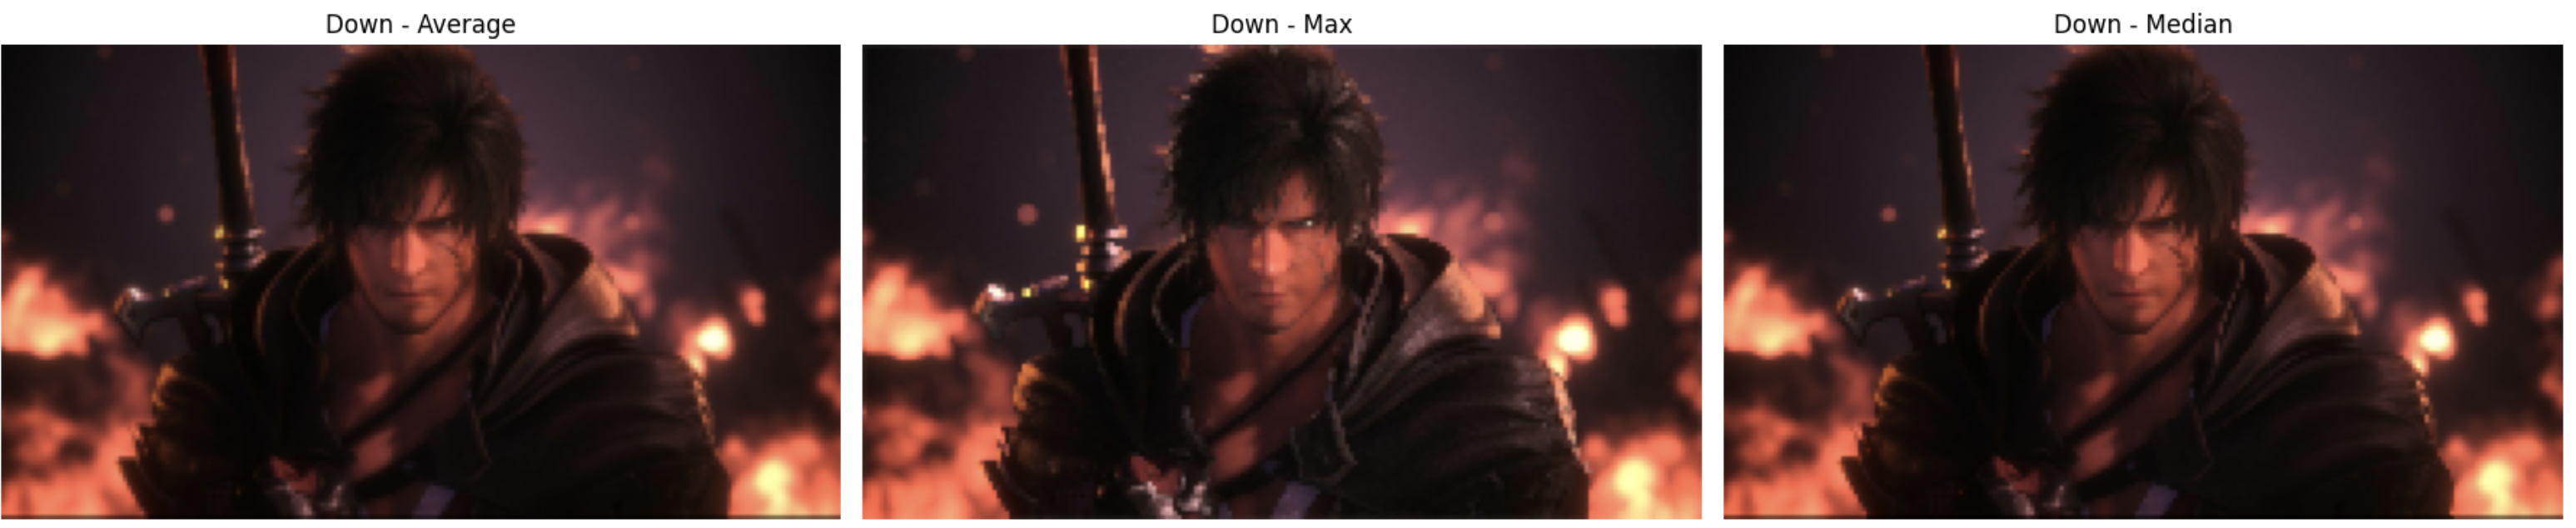

Up Sampling ((NN, Bilinear, Bicubic)

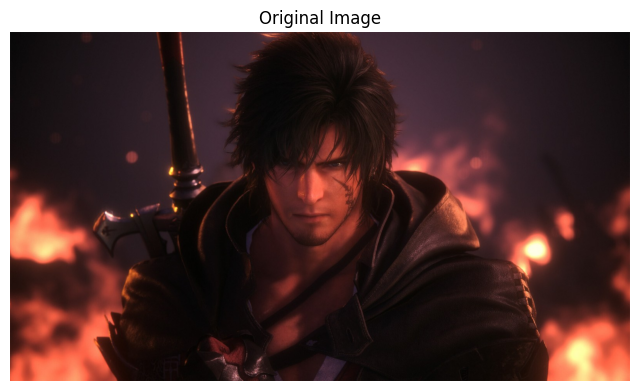

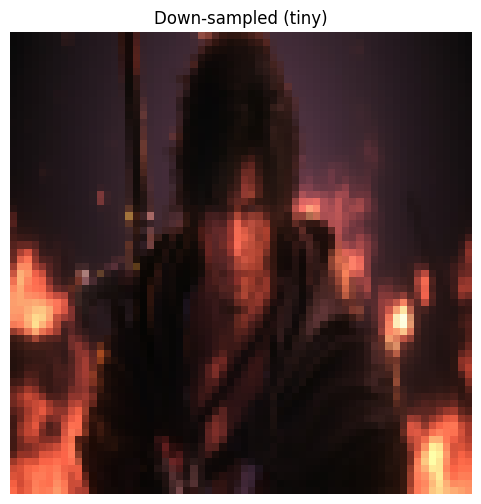

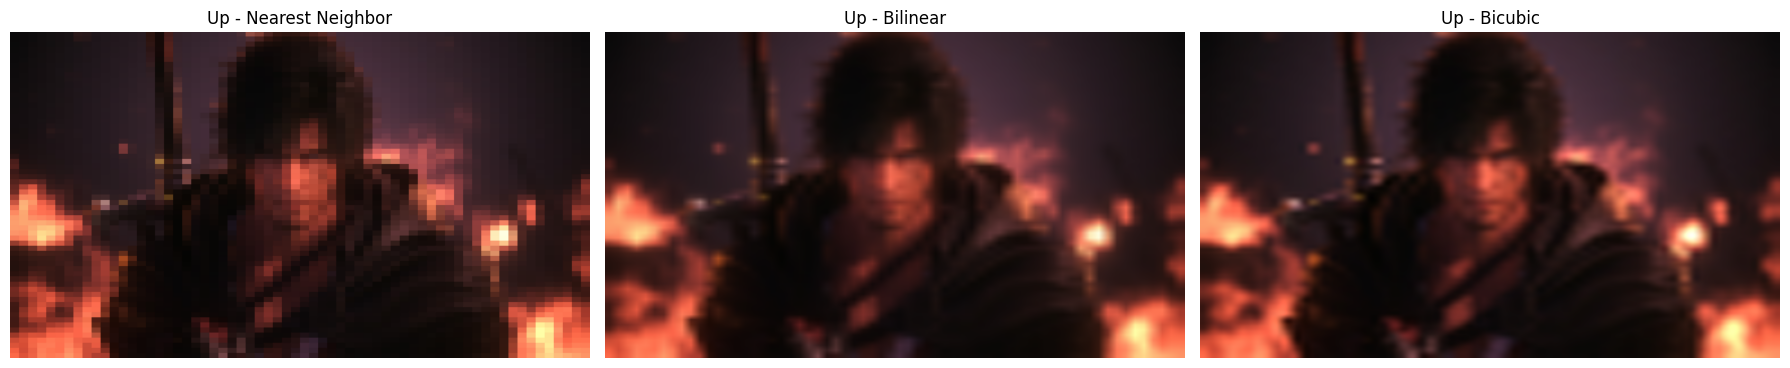

In [ ]:
import cv2
import matplotlib.pyplot as plt

# -----------------------------
# 1. Down-sample to tiny size
# -----------------------------
small_size = (64, 64)  # try smaller like (32,32) for more dramatic effect
img_small = cv2.resize(img, small_size, interpolation=cv2.INTER_AREA)

# -----------------------------
# 2. Up-sample back to original size
# -----------------------------
h, w = img.shape[:2]

up_nearest = cv2.resize(img_small, (w, h), interpolation=cv2.INTER_NEAREST)
up_linear  = cv2.resize(img_small, (w, h), interpolation=cv2.INTER_LINEAR)
up_cubic   = cv2.resize(img_small, (w, h), interpolation=cv2.INTER_CUBIC)

# -----------------------------
# 3. Show images
# -----------------------------

# Show original image separately
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Show down-sampled tiny version
plt.figure(figsize=(6, 6))
plt.imshow(img_small)
plt.title("Down-sampled (tiny)")
plt.axis("off")
plt.show()

# Show up-sampled versions side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(up_nearest)
axes[0].set_title("Up - Nearest Neighbor")
axes[0].axis("off")

axes[1].imshow(up_linear)
axes[1].set_title("Up - Bilinear")
axes[1].axis("off")

axes[2].imshow(up_cubic)
axes[2].set_title("Up - Bicubic")
axes[2].axis("off")

plt.tight_layout()
plt.show()


Results From Up-Sampling a tizy size (to see clear difference):

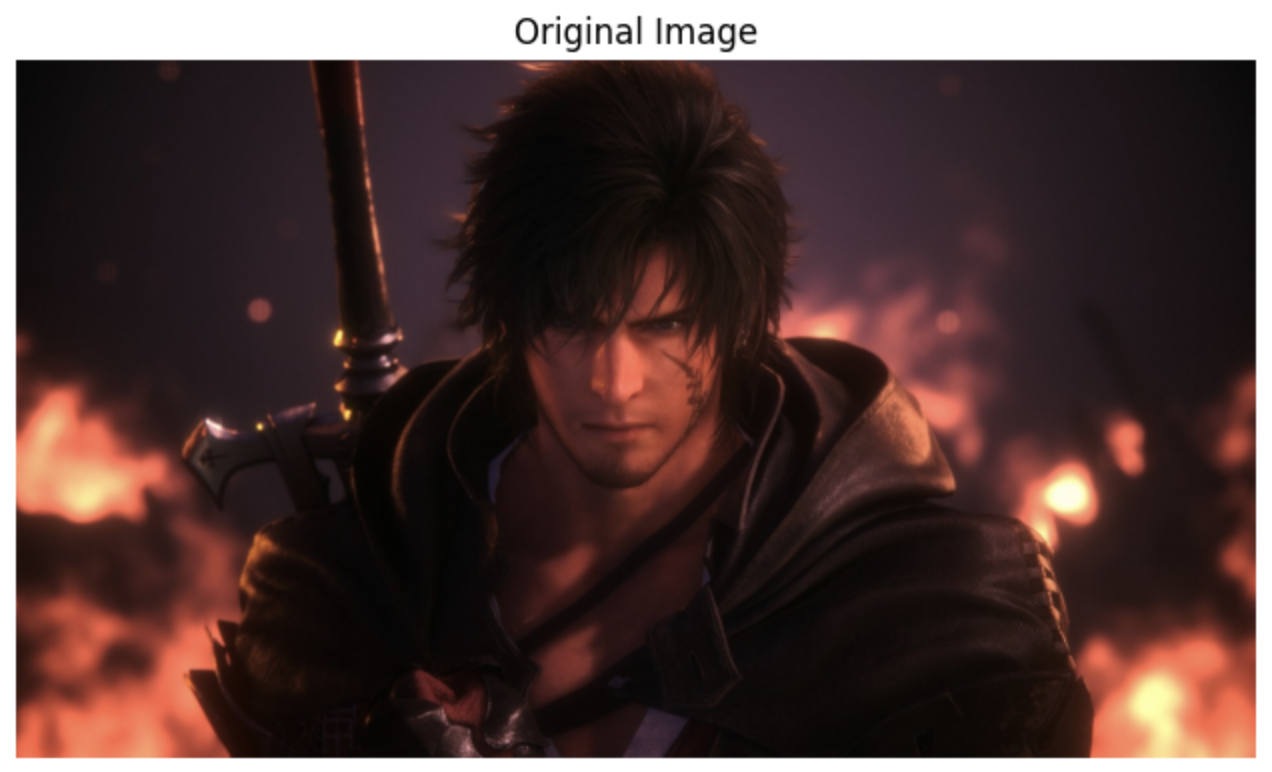

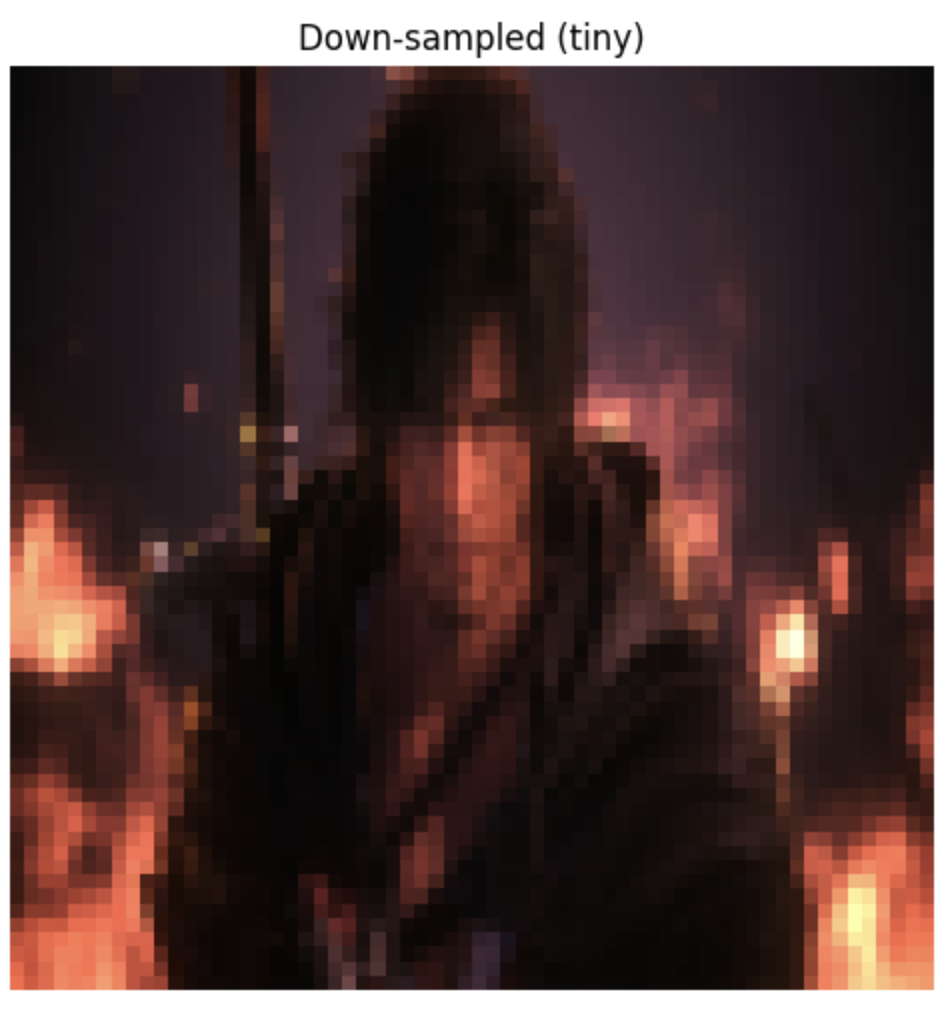

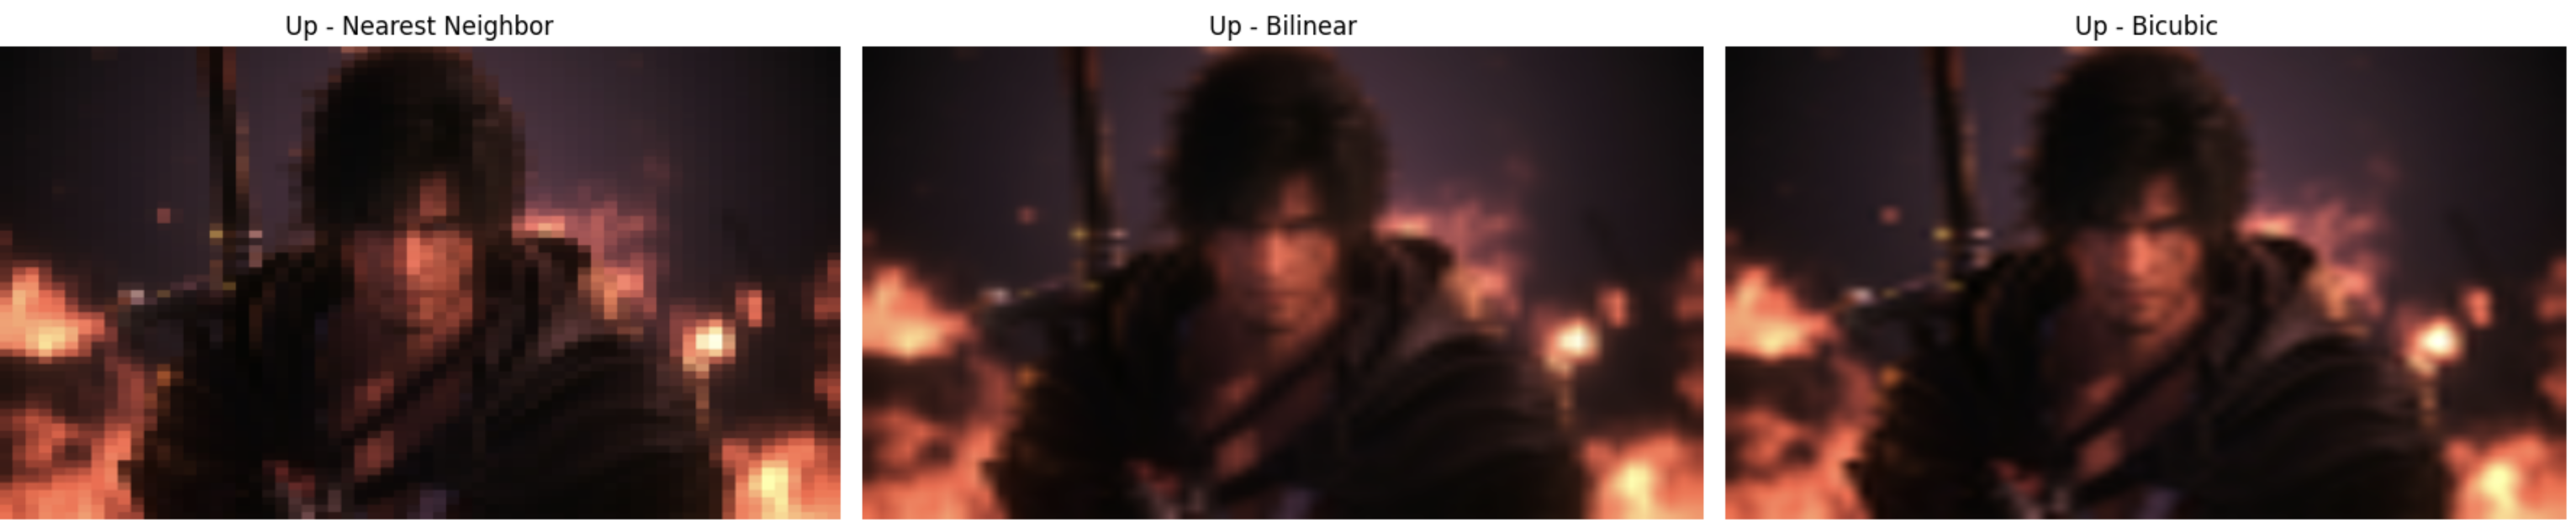

So for this I have:
1. Shrink the image to a tiny size to throw away the detail.
2. Then by using up sampling, I can try to reconstruct the image.
Nearest neighbor looks more pixelated while bilinear and bicubic is smoother but bicubic has better detail.
3. By shriking the image, Ill be able to see a clear difference when using the upsampling.

What was demonstrated:

The human visual system or HVS doesn't process every pixel in detail at once. Instead, it adapts by selectively down-sampling information, focusing only on what matters most.

- Average Pooling us for larger and slower moving objects, the HVS relies on something like average pooling which creates a smoother, lower resolution version of the scene. This gives the main picture by removing/ignoring irrelevant details.
- Max pooling comes to smmaller, sharper or faster moving projects where the HVS shifts attention to key regions. This approach highlights the strongest features, like edges, making sure critical details are not missed.

Now after pruning and prioritizng, the HVS rconstructs details when needed, bringing Up-Sampling. It takes simplified data and refining it into a clearer picture for decision making.
Different interpolation methods control the quality of this refinement:

- Nearest neighbor produces pixelated output
- Bilinear smooths things out but sacrfices sharpness
- Bicubic resotres more detail and produces a sharper image

The code example direclty model how down sampling and up smapling work together in a dynamic vision system.
- Down sampling (average, max, median): each method preserves different kinds of information. Average pooling simplifies the scene for a broad view, max pooling preserves strong features and median pooling balances between smoothing and detail. This mirrors how the HVS switches between wide context and sharp focus
- Up sampling (nearest, bilinear, bicubic): these methods reconstruct detail from reduced data. The difference in sharpness and smootheness between them highlight how the HVS could choose different refinement strategies depending on the task at hand.